# 20기 Clustering 정규세션 과제

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/MJHwang/Downloads/Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## 1. Preprocssing / EDA

In [47]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual Income (k$)'}>],
       [<AxesSubplot:title={'center':'Spending Score (1-100)'}>,
        <AxesSubplot:>]], dtype=object)

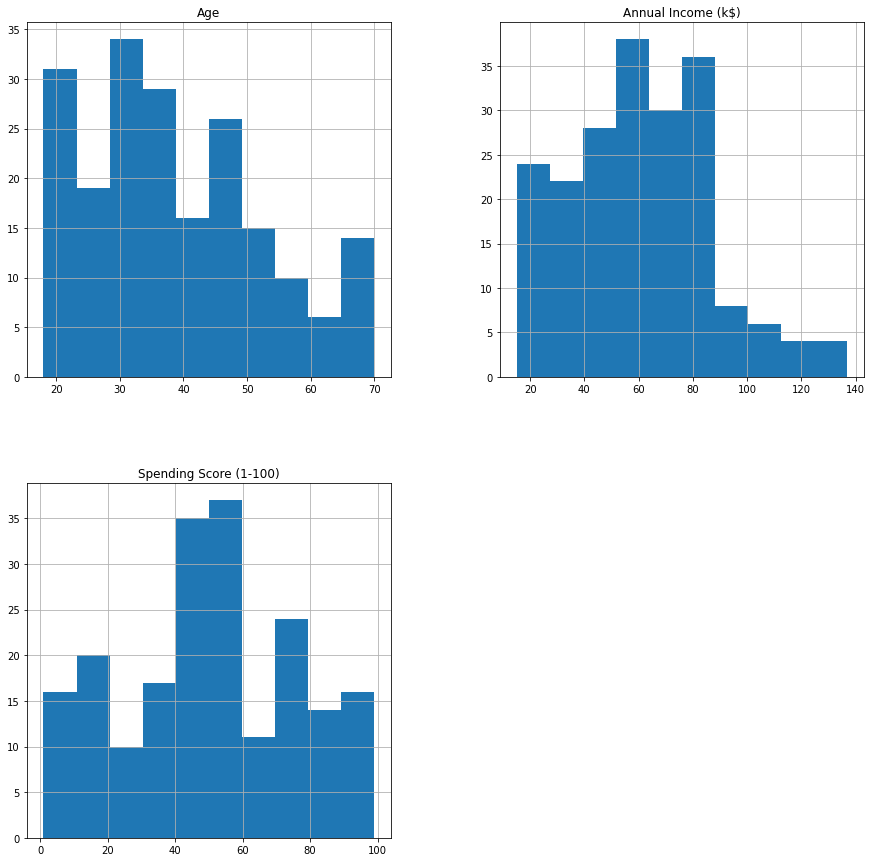

In [49]:
df.hist(figsize=(15,15))

In [50]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

([<matplotlib.patches.Wedge at 0x221725683a0>,
 [Text(-1.080515974257694, -0.20611945413751373, 'Female'),
  Text(1.080515974257694, 0.20611945413751362, 'Male')],
 [Text(-0.5893723495951058, -0.11242879316591657, '56.0%'),
  Text(0.5893723495951058, 0.1124287931659165, '44.0%')])

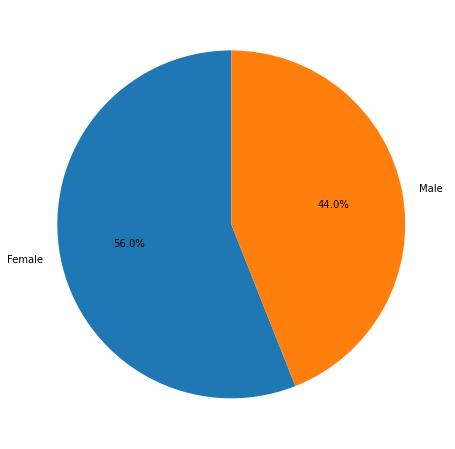

In [51]:
plt.figure(figsize=(8,8))
plt.pie(df['Gender'].value_counts(), labels = df['Gender'].value_counts().index,autopct='%1.1f%%', startangle=90)

In [52]:
df.shape

(200, 4)

In [53]:
df.groupby(by=['Gender']).mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


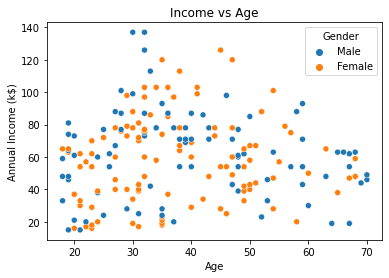

In [60]:
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)',hue="Gender")
plt.title('Income vs Age')
plt.show()

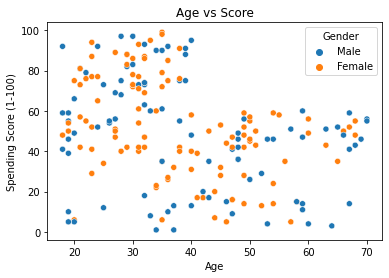

In [61]:
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue="Gender")
plt.title('Age vs Score')
plt.show()

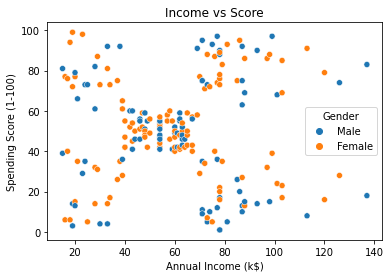

In [59]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue="Gender")
plt.title('Income vs Score')
plt.show()

Annual Income과 Spending Score의 scatter plot을 살펴봤을 때 군집이 가장 잘 될 거라고 판단됨

## 2. Clustering

In [68]:
data = df[["Annual Income (k$)", "Spending Score (1-100)"]]
data.head()
# 군집이 잘 구성될 것이라고 판단되는 열만 남겨둠

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


C:\Users\MJHwang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=9), k=(1, 10))

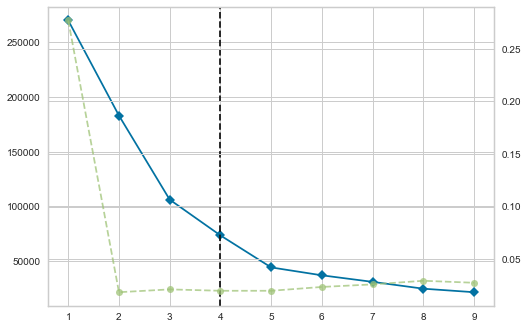

In [69]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

#elbow point
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(data)

엘보우 점수 상 알맞은 군집 개수는 4개로 판단됨.

In [73]:
kmeans = KMeans(init="k-means++", n_clusters=4, n_init=12)
kmeans.fit(data)

KMeans(n_clusters=4, n_init=12)

In [74]:
kmeans_labels = kmeans.labels_ ;kmeans_labels

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

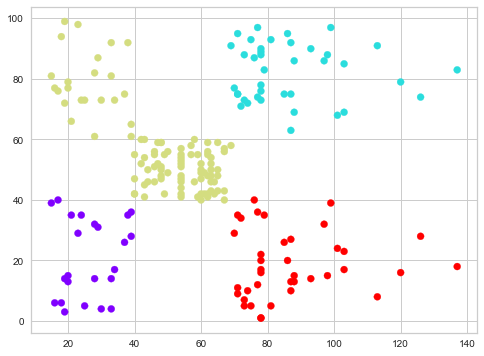

In [76]:
plt.figure(figsize=(8, 6))
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=kmeans.labels_, cmap='rainbow')

scatterplot 그림 상 군집이 5개로도 구성될 수 있을 것이라 판단해 n_cluster = 5로 설정 후 실루엣 계수로 더 나은 결과를 도출하기로 결정

In [79]:
kmeans_5 = KMeans(init="k-means++", n_clusters=5, n_init=12)
kmeans_5.fit(data)

KMeans(n_clusters=5, n_init=12)

In [80]:
kmeans_labels_5 = kmeans_5.labels_ ;kmeans_labels

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

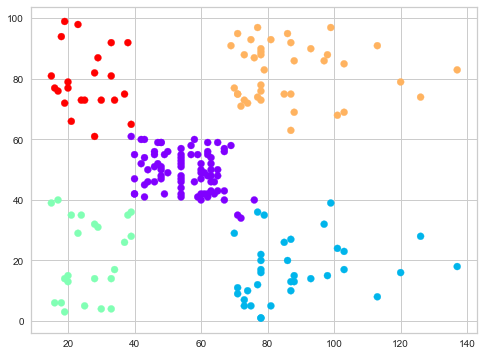

In [81]:
plt.figure(figsize=(8, 6))
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=kmeans_5.labels_, cmap='rainbow')

## 3. Evaluation

In [82]:
from sklearn.metrics import silhouette_score
silhouette_score(data, kmeans.labels_, metric='euclidean') #n_cluster = 4

0.4931963109249047

In [83]:
from sklearn.metrics import silhouette_score
silhouette_score(data, kmeans_5.labels_, metric='euclidean') #n_cluster = 5

0.553931997444648

n_cluster = 5로 설정했을 시의 실루엣 점수가 더 높다. 또한 이 값이 0.5 이상이므로 군집 결과가 타당하다는 것을 나타내고 있음을 알 수 있다. 